# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Your Code Here

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [7]:
titanic = pd.read_csv('../data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [8]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [20]:
numerical_vars = titanic.select_dtypes(include=['int', 'float'])
print(numerical_vars.columns)

categorical_vars = titanic.select_dtypes(include=['object', 'category'])
print(categorical_vars.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [22]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

#### Use the right visulalization to show the distribution of column `Age`.

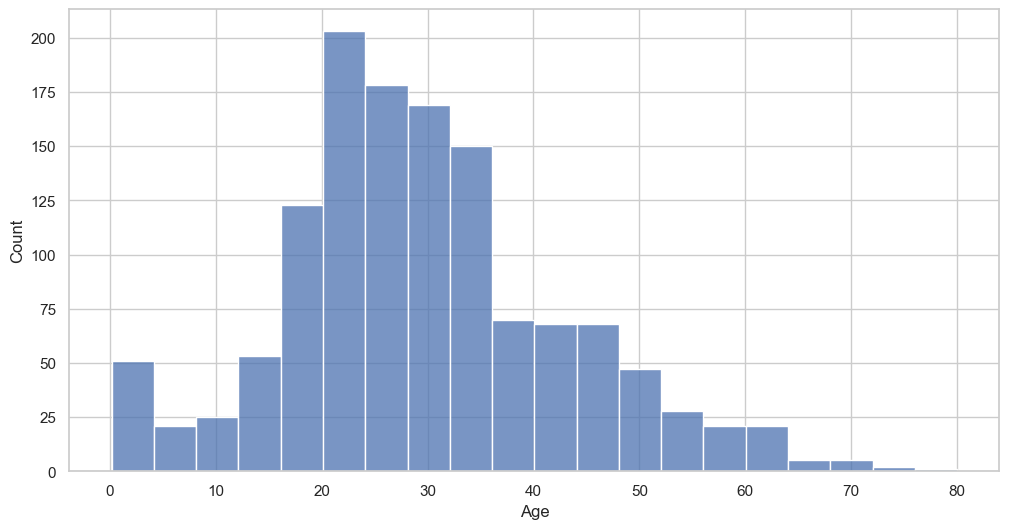

In [34]:
sns.histplot(x=titanic.Age, bins=20)
plt.savefig("../figures/figure3.png")

#### How does the bin size affect your plot?

In [ ]:
#The smaller the bin size, the more detail and granularity. The bigger the bin size, the more generalised the plot. Smaller bin size more accurate but more susceptible to outliers, bigger bin size less detailed but 'smoother', more likely to demonstrate pattern.

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

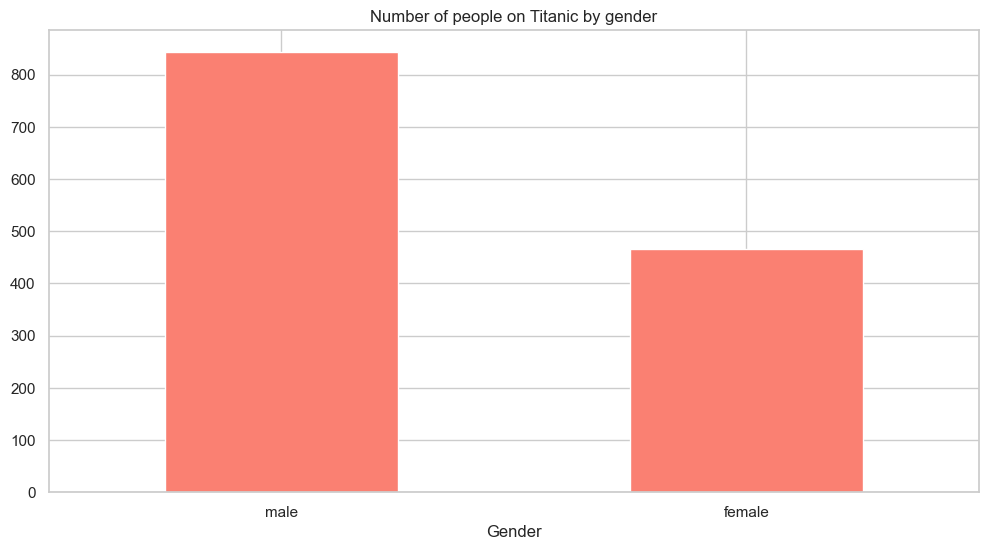

In [44]:
# Method 1 - matplotlib
titanic["Gender"].value_counts().plot(kind="bar", color="salmon", title="Number of people on Titanic by gender")
plt.xticks(rotation=0);
plt.savefig("../figures/figure4.png")

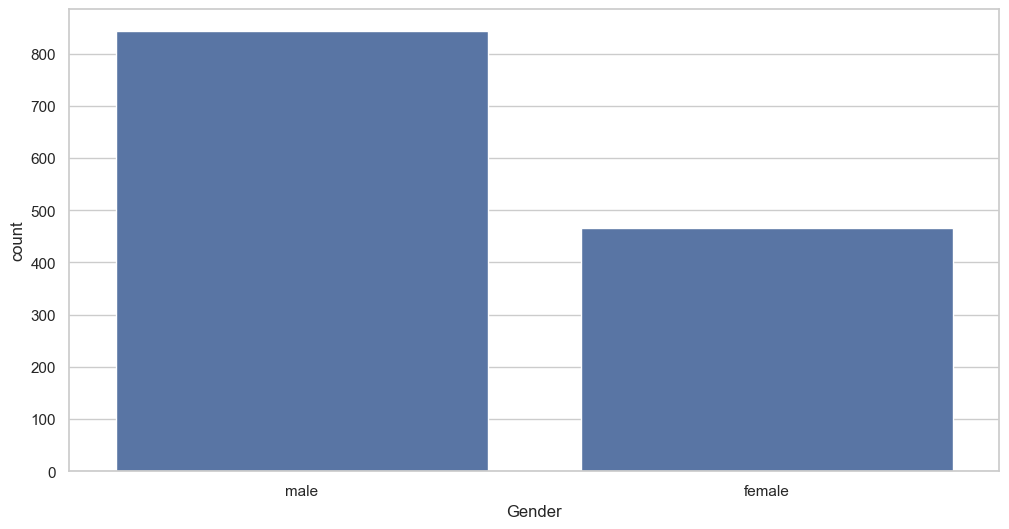

In [49]:
# Method 2 - seaborn
sns.countplot(x=titanic.Gender)
plt.savefig("../figures/figure5.png")


#### Use the right plot to visualize the column `Pclass`.

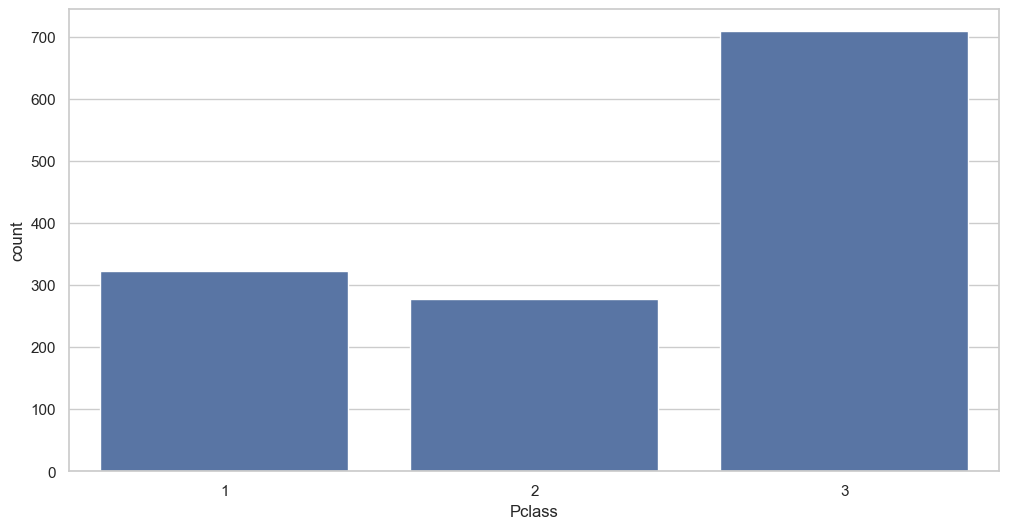

In [58]:
sns.countplot(x=titanic.Pclass)
plt.savefig("../figures/figure6.png")

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it and list all the info it's giving you.

[Hint](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

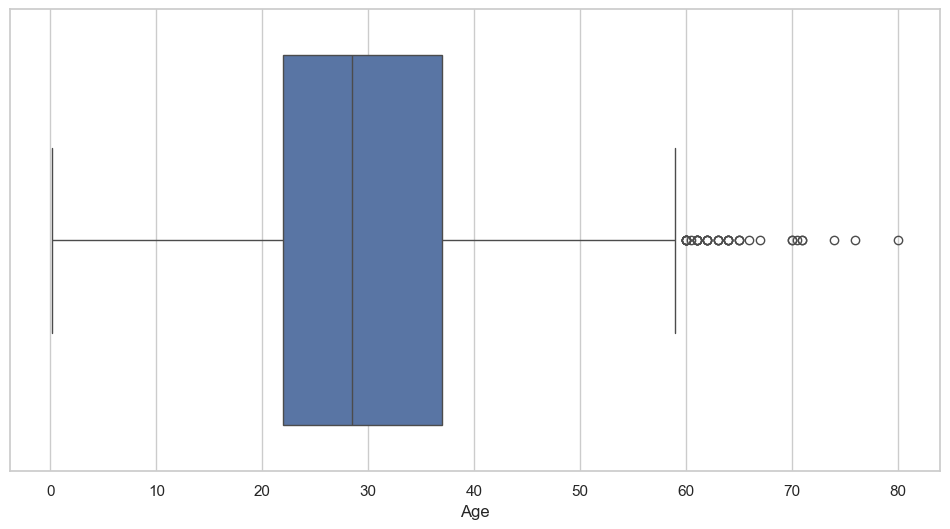

In [76]:
box = sns.boxplot(x=titanic["Age"])
plt.savefig("../figures/figure7.png")

In [ ]:
"""
The box represents the middle quartile, with the median age represented as the line in the middle. The lower and upper quartiles are the left and right edge of the box.The maximum and minimum values are the lines at the far right and left, and the dots on the right are the outliers.


"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

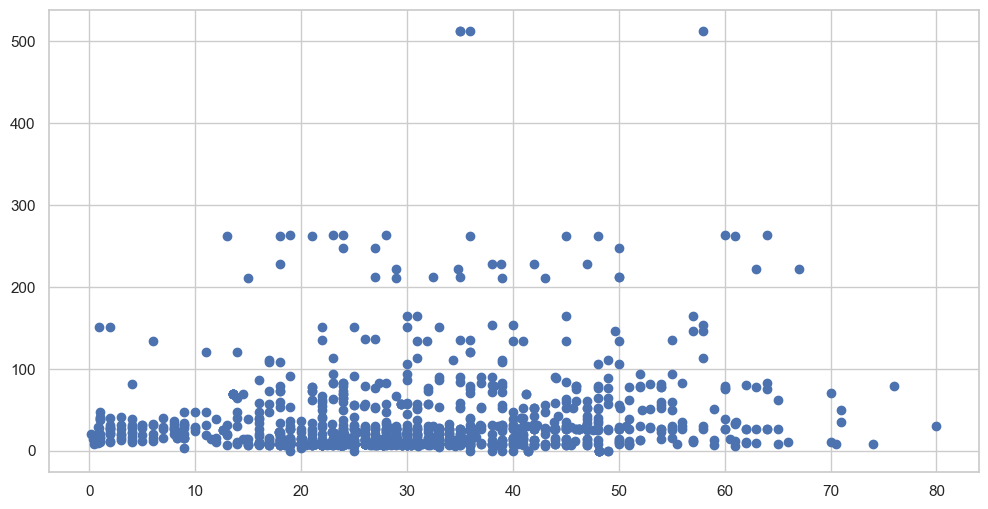

In [78]:
# Method 1 - matplotlib
fare_age_1= plt.scatter(x=titanic["Age"], y=titanic["Fare"]);
plt.savefig("../figures/figure8.png")

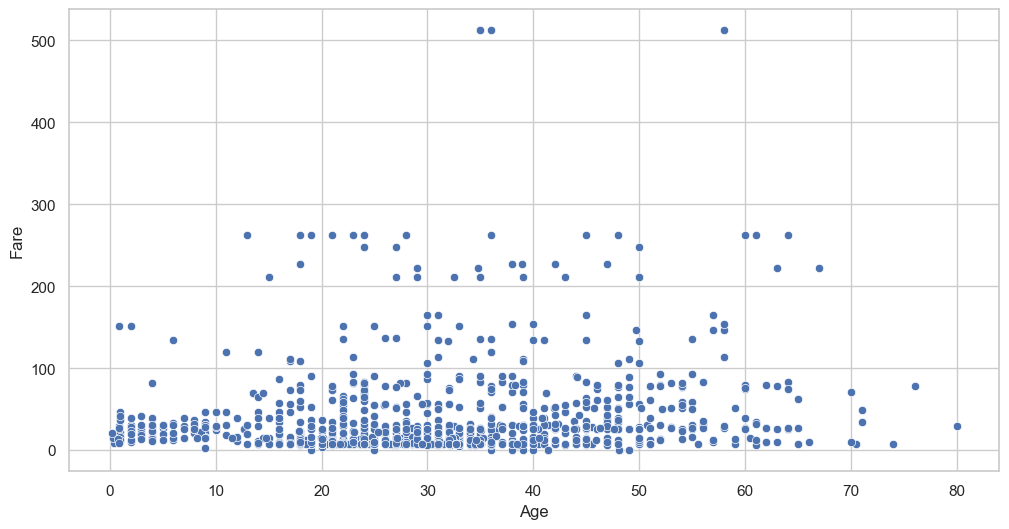

In [79]:
# Method 2 - seaborn
fare_age_2 = sns.scatterplot(x= "Age", y="Fare", data=titanic)
plt.savefig("../figures/figure9.png")

#### Plot the correlation matrix using seaborn.

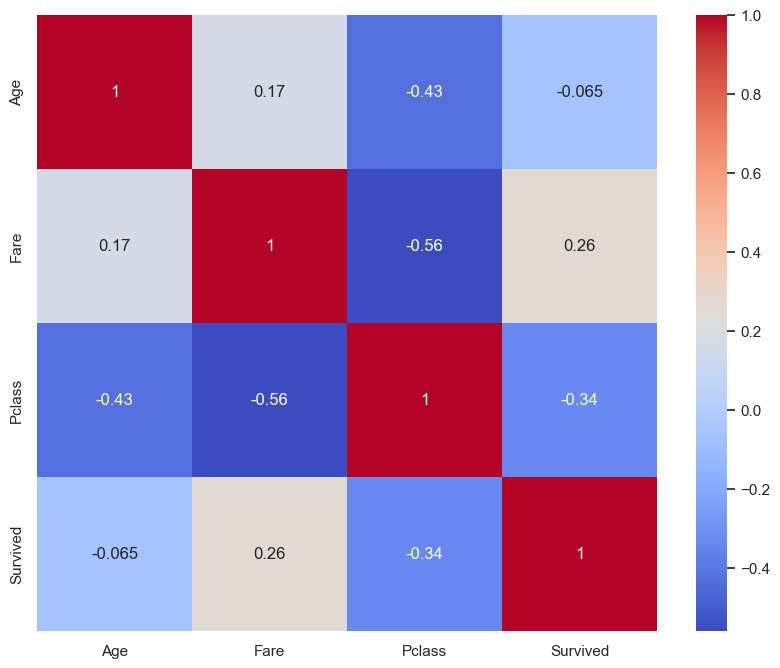

In [107]:
corr_matrix = titanic[['Age', 'Fare', 'Pclass', 'Survived']].corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.savefig("../figures/figure10.png")
plt.show()


#### What are the most correlated features?

In [ ]:
"""
The most strongly correlated are Fare and Pclass - this makes sense since obviously the more expensive fares would be for the upper class cabins.

"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

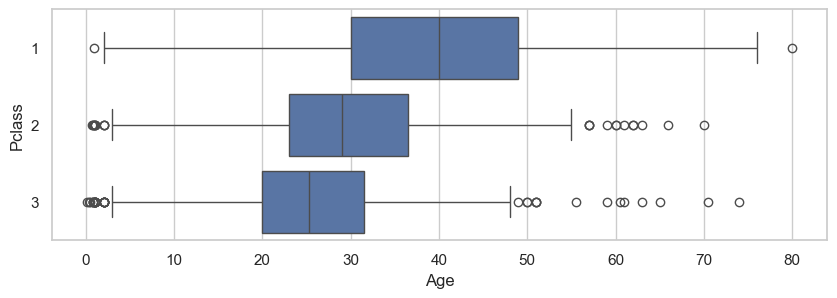

In [106]:
plt.figure(figsize=(10, 3))
titanic["Pclass"] = titanic["Pclass"].astype("category")
box = sns.boxplot(x=titanic["Age"], y=titanic["Pclass"])
plt.savefig("../figures/figure11.png")
plt.show()


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

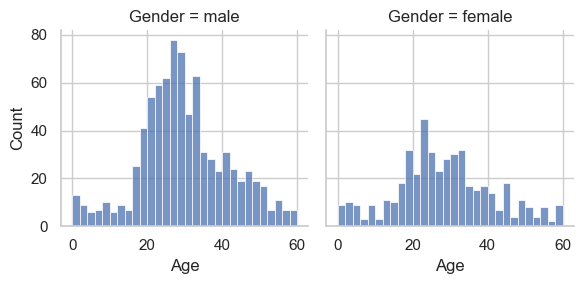

In [105]:
g = sns.FacetGrid(titanic, col="Gender")
g.map_dataframe(sns.histplot, x="Age", binwidth=2, binrange=(0, 60))
plt.savefig("../figures/figure12.png")
plt.show()
